# Crime Of Chicago

Brittany Lassiter

## Objective

- Download and preparing a crime dataset for time series analysis.- Aanswer the provided stakeholder questions and support your answers with visualizations.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [2]:
# api_url = "https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$query=SELECT%0A%20%20%60id%60%2C%0A%20%20%60case_number%60%2C%0A%20%20%60date%60%2C%0A%20%20%60block%60%2C%0A%20%20%60iucr%60%2C%0A%20%20%60primary_type%60%2C%0A%20%20%60description%60%2C%0A%20%20%60location_description%60%2C%0A%20%20%60arrest%60%2C%0A%20%20%60domestic%60%2C%0A%20%20%60beat%60%2C%0A%20%20%60district%60%2C%0A%20%20%60ward%60%2C%0A%20%20%60community_area%60%2C%0A%20%20%60fbi_code%60%2C%0A%20%20%60x_coordinate%60%2C%0A%20%20%60y_coordinate%60%2C%0A%20%20%60year%60%2C%0A%20%20%60updated_on%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60location%60%2C%0A%20%20%60%3A%40computed_region_awaf_s7ux%60%2C%0A%20%20%60%3A%40computed_region_6mkv_f3dw%60%2C%0A%20%20%60%3A%40computed_region_vrxf_vc4k%60%2C%0A%20%20%60%3A%40computed_region_bdys_3d7i%60%2C%0A%20%20%60%3A%40computed_region_43wa_7qmu%60%2C%0A%20%20%60%3A%40computed_region_rpca_8um6%60%2C%0A%20%20%60%3A%40computed_region_d9mm_jgwp%60%2C%0A%20%20%60%3A%40computed_region_d3ds_rm58%60%0AWHERE%20%60date%60%20%3C%20%222023-01-01T15%3A15%3A35%22%20%3A%3A%20floating_timestamp%0AORDER%20BY%20%60date%60%20DESC%20NULL%20FIRST"
fpath = 'C:/Users/blass/Downloads/Crimes_-_2001_to_Present.csv'
df = pd.read_csv(fpath)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN
2,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
3,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,27.0,28.0,11,1160870.0,1898642.0,2023,09/16/2023 03:41:56 PM,41.877565,-87.684791,"(41.877565108, -87.68479102)"
4,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,7.0,43.0,02,1190812.0,1856743.0,2023,09/16/2023 03:41:56 PM,41.761919,-87.576209,"(41.7619185, -87.576209245)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935430 entries, 0 to 7935429
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [4]:
# making new folder with os
import os,glob
os.makedirs('Data/',exist_ok=True)

In [5]:
# Confirm folder was created and files added successfully
os.listdir("Data/")

['.ipynb_checkpoints', 'Chicago']

In [6]:
## SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

## Data clean

In [7]:
import pandas as pd

chicago_full = df#pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN
2,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
3,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,27.0,28.0,11,1160870.0,1898642.0,2023,09/16/2023 03:41:56 PM,41.877565,-87.684791,"(41.877565108, -87.68479102)"
4,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,7.0,43.0,02,1190812.0,1856743.0,2023,09/16/2023 03:41:56 PM,41.761919,-87.576209,"(41.7619185, -87.576209245)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935425,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
7935426,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
7935427,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
7935428,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [8]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
147833,1311933,G002620,01/01/2001 01:00:00 AM,016XX N LEAVITT ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,...,NaN,17,1161480.0,1910757.0,2001,08/17/2015 03:03:40 PM,41.910797,-87.682214,"(41.910796986, -87.682213687)",2001-01-01 01:00:00
92729,1317380,G003733,01/01/2001 01:00:00 PM,047XX S ROCKWELL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1159873.0,1873101.0,2001,08/17/2015 03:03:40 PM,41.807498,-87.689155,"(41.807498413, -87.68915513)",2001-01-01 01:00:00
67974,1422085,G143929,01/01/2001 01:00:00 AM,016XX S CALIFORNIA AV,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,...,NaN,26,1158003.0,1891509.0,2001,08/17/2015 03:03:40 PM,41.858050,-87.695513,"(41.858050399, -87.695512503)",2001-01-01 01:00:00
96643,1323184,G017467,01/01/2001 01:00:00 PM,102XX S WOOD ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,NaN,26,1166196.0,1836771.0,2001,08/17/2015 03:03:40 PM,41.707671,-87.666996,"(41.707671475, -87.666996186)",2001-01-01 01:00:00
115879,1313086,G004657,01/01/2001 01:00:00 PM,039XX N DRAKE AV,0810,THEFT,OVER $500,OTHER,False,False,...,NaN,06,1151978.0,1926092.0,2001,08/17/2015 03:03:40 PM,41.953070,-87.716716,"(41.953070112, -87.716715611)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48530,13270064,JG495128,11/07/2023 12:00:00 AM,012XX S FAIRFIELD AVE,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,29.0,07,1158231.0,1894128.0,2023,11/14/2023 03:42:12 PM,41.865233,-87.694604,"(41.865232556, -87.694604079)",2023-11-07 12:00:00
48977,13269791,JG495760,11/07/2023 12:00:00 AM,022XX W FARWELL AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,2.0,07,1159936.0,1945555.0,2023,11/14/2023 03:42:12 PM,42.006317,-87.686921,"(42.006316581, -87.686921476)",2023-11-07 12:00:00
48393,13273451,JG499744,11/07/2023 12:00:00 AM,038XX S WELLS ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,34.0,17,1175276.0,1879289.0,2023,11/14/2023 03:42:12 PM,41.824148,-87.632476,"(41.82414815, -87.632476338)",2023-11-07 12:00:00
48192,13272123,JG497571,11/07/2023 12:00:00 AM,012XX W BRYN MAWR AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,77.0,06,1166826.0,1937328.0,2023,11/14/2023 03:42:12 PM,41.983596,-87.661810,"(41.983595965, -87.661809707)",2023-11-07 12:00:00


## Separate the Full Dataset by Years

In [9]:
chicago_full['Datetime'].dt.year

147833    2001
92729     2001
67974     2001
96643     2001
115879    2001
          ... 
48530     2023
48977     2023
48393     2023
48192     2023
49015     2023
Name: Datetime, Length: 7935430, dtype: int64

In [10]:
# Removing 2023
filter_pre_2023 =  chicago_full['Datetime'].dt.year<2023
chicago_2023 = chicago_full[~filter_pre_2023]
chicago_full = chicago_full[filter_pre_2023]
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
147833,1311933,G002620,01/01/2001 01:00:00 AM,016XX N LEAVITT ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,...,NaN,17,1161480.0,1910757.0,2001,08/17/2015 03:03:40 PM,41.910797,-87.682214,"(41.910796986, -87.682213687)",2001-01-01 01:00:00
92729,1317380,G003733,01/01/2001 01:00:00 PM,047XX S ROCKWELL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1159873.0,1873101.0,2001,08/17/2015 03:03:40 PM,41.807498,-87.689155,"(41.807498413, -87.68915513)",2001-01-01 01:00:00
67974,1422085,G143929,01/01/2001 01:00:00 AM,016XX S CALIFORNIA AV,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,...,NaN,26,1158003.0,1891509.0,2001,08/17/2015 03:03:40 PM,41.858050,-87.695513,"(41.858050399, -87.695512503)",2001-01-01 01:00:00
96643,1323184,G017467,01/01/2001 01:00:00 PM,102XX S WOOD ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,NaN,26,1166196.0,1836771.0,2001,08/17/2015 03:03:40 PM,41.707671,-87.666996,"(41.707671475, -87.666996186)",2001-01-01 01:00:00
115879,1313086,G004657,01/01/2001 01:00:00 PM,039XX N DRAKE AV,0810,THEFT,OVER $500,OTHER,False,False,...,NaN,06,1151978.0,1926092.0,2001,08/17/2015 03:03:40 PM,41.953070,-87.716716,"(41.953070112, -87.716715611)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812148,12937822,JF528703,12/31/2022 12:50:00 PM,070XX S GREEN ST,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,...,68.0,04A,1171848.0,1858270.0,2022,01/07/2023 03:41:08 PM,41.766546,-87.645669,"(41.766545786, -87.64566932)",2022-12-31 12:50:00
7742611,12938029,JF528801,12/31/2022 12:50:00 PM,018XX S HAMLIN AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,False,...,29.0,08A,1151347.0,1890681.0,2022,01/07/2023 03:41:08 PM,41.855911,-87.719966,"(41.855911352, -87.719966)",2022-12-31 12:50:00
7755493,12938420,JF528704,12/31/2022 12:52:00 PM,027XX N ELSTON AVE,0560,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,...,22.0,08A,1160488.0,1918000.0,2022,01/07/2023 03:41:08 PM,41.930693,-87.685657,"(41.930692897, -87.685656977)",2022-12-31 12:52:00
7787255,12937583,JF528218,12/31/2022 12:52:00 AM,010XX S WESTERN AVE,0460,BATTERY,SIMPLE,BARBERSHOP,False,False,...,28.0,08B,1160538.0,1895456.0,2022,01/07/2023 03:41:08 PM,41.868829,-87.686098,"(41.868829303, -87.686098247)",2022-12-31 12:52:00


In [11]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

C:\Users\blass\AppData\Local\Temp\ipykernel_26600\1837281314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)


2002    486808
2001    485897
2003    475987
2004    469427
2005    453774
2006    448179
2007    437090
2008    427186
2009    392828
2010    370518
2011    351997
2012    336327
2013    307542
2014    275799
2016    269845
2017    269114
2018    268927
2015    264810
2019    261383
2022    239045
2020    212250
2021    208951
Name: Year, dtype: int64

In [12]:
# Drop columns not needed
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [13]:
# Saving data to keep clean df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,2001,41.910797,-87.682214
2001-01-01 01:00:00,1317380,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,2001,41.807498,-87.689155
2001-01-01 01:00:00,1422085,01/01/2001 01:00:00 AM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1023,10.0,NaN,2001,41.858050,-87.695513
2001-01-01 01:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,41.707671,-87.666996
2001-01-01 01:00:00,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,2001,41.953070,-87.716716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,2022,41.766546,-87.645669
2022-12-31 12:50:00,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,2022,41.855911,-87.719966
2022-12-31 12:52:00,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,2022,41.930693,-87.685657


## Get the Years

In [14]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'], dtype=object)

In [15]:
FINAL_DROP = ['Year']

## Prepare and Save Data

In [16]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [17]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv']

In [18]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)

readme_fpath = f"{OUTPUT_FOLDER}README.txt"
with open(readme_fpath,'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [19]:
readme_fpath

'Data/Chicago/README.txt'

In [20]:
saved_files.append(readme_fpath)
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago/README.txt']

In [21]:
ZIP_FILE = "Data/Chicago_Crime_2001-2022.zip"

In [22]:
## opening google drive folder to upload zip
import webbrowser
link = "https://drive.google.com/drive/folders/1TQzVrf3Wc6g1lv2j1EwcyFyE64P6ursz?usp=drive_link"
webbrowser.open(link)

True

In [44]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
1,1317380,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,41.807498,-87.689155
2,1422085,01/01/2001 01:00:00 AM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1023,10.0,NaN,41.858050,-87.695513
3,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
4,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716
...,...,...,...,...,...,...,...,...,...,...,...,...
239040,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
239041,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
239042,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657
239043,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [45]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485897
2002    486808
2003    475987
2004    469427
2005    453774
2006    448179
2007    437090
2008    427186
2009    392828
2010    370518
2011    351997
2012    336327
2013    307542
2014    275799
2015    264810
2016    269845
2017    269114
2018    268927
2019    261383
2020    212250
2021    208951
2022    239045
Name: Date, dtype: int64

## Updated Crime Data

In [46]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
1,1317380,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,41.807498,-87.689155
2,1422085,01/01/2001 01:00:00 AM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1023,10.0,NaN,41.858050,-87.695513
3,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
4,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713684 entries, 0 to 239044
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.1+ MB


In [48]:
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     11053
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614850
Latitude                 89296
Longitude                89296
dtype: int64

In [49]:
# Dropping NA rows
df = df.dropna(subset = ["Location Description", "Latitude", "Longitude", "District"])

In [50]:
# Date format
df.loc[0,'Date']

0    01/01/2001 01:00:00 AM
0    01/01/2002 01:00:00 AM
0    01/01/2003 01:00:00 AM
0    01/01/2004 01:00:00 PM
0    01/01/2005 01:00:00 AM
0    01/01/2006 01:00:00 AM
0    01/01/2008 01:00:00 PM
0    01/01/2009 01:00:00 AM
0    01/01/2010 01:00:00 PM
0    01/01/2011 01:00:00 AM
0    01/01/2012 01:00:00 AM
0    01/01/2013 01:00:00 AM
0    01/01/2014 01:00:00 AM
0    01/01/2015 01:00:00 AM
0    01/01/2016 01:00:00 AM
0    01/01/2018 01:00:00 PM
0    01/01/2020 01:00:00 PM
0    01/01/2021 01:00:00 PM
0    01/01/2022 01:00:00 PM
Name: Date, dtype: object

In [52]:
# Changing date to datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y %I:%M:%S %p')
df['Date']

C:\Users\blass\AppData\Local\Temp\ipykernel_26600\3005095567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y %I:%M:%S %p')


0        2001-01-01 01:00:00
1        2001-01-01 13:00:00
2        2001-01-01 01:00:00
3        2001-01-01 13:00:00
4        2001-01-01 13:00:00
                 ...        
239039   2022-12-31 00:45:00
239040   2022-12-31 12:50:00
239041   2022-12-31 12:50:00
239042   2022-12-31 12:52:00
239043   2022-12-31 00:52:00
Name: Date, Length: 7617799, dtype: datetime64[ns]

In [53]:
# Date as index
df = df.set_index("Date")
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1311933,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
2001-01-01 13:00:00,1317380,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,41.807498,-87.689155
2001-01-01 01:00:00,1422085,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1023,10.0,NaN,41.858050,-87.695513
2001-01-01 13:00:00,1323184,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
2001-01-01 13:00:00,1313086,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716


In [54]:
# Data types
df["Primary Type"].value_counts().sort_values(ascending = False)

THEFT                                1605168
BATTERY                              1404518
CRIMINAL DAMAGE                       874273
NARCOTICS                             733592
ASSAULT                               498825
OTHER OFFENSE                         474685
BURGLARY                              420367
MOTOR VEHICLE THEFT                   363097
DECEPTIVE PRACTICE                    316092
ROBBERY                               288116
CRIMINAL TRESPASS                     211811
WEAPONS VIOLATION                     103364
PROSTITUTION                           69080
PUBLIC PEACE VIOLATION                 51834
OFFENSE INVOLVING CHILDREN             51394
SEX OFFENSE                            28532
CRIM SEXUAL ASSAULT                    26079
INTERFERENCE WITH PUBLIC OFFICER       18138
LIQUOR LAW VIOLATION                   14706
GAMBLING                               14518
ARSON                                  13032
HOMICIDE                               12393
KIDNAPPING

In [55]:
# Cleaning the data types names 
name_types = {"NON - CRIMINAL": "NON-CRIMINAL",
               "CRIM SEXUAL ASSAULT": "CRIMINAL SEXUAL ASSAULT"}
df.replace(name_types, inplace = True)

df["Primary Type"].value_counts().sort_values(ascending = False)

THEFT                                1605168
BATTERY                              1404518
CRIMINAL DAMAGE                       874273
NARCOTICS                             733592
ASSAULT                               498825
OTHER OFFENSE                         474685
BURGLARY                              420367
MOTOR VEHICLE THEFT                   363097
DECEPTIVE PRACTICE                    316092
ROBBERY                               288116
CRIMINAL TRESPASS                     211811
WEAPONS VIOLATION                     103364
PROSTITUTION                           69080
PUBLIC PEACE VIOLATION                 51834
OFFENSE INVOLVING CHILDREN             51394
CRIMINAL SEXUAL ASSAULT                31596
SEX OFFENSE                            28532
INTERFERENCE WITH PUBLIC OFFICER       18138
LIQUOR LAW VIOLATION                   14706
GAMBLING                               14518
ARSON                                  13032
HOMICIDE                               12393
KIDNAPPING

## Supplemental Data: Holiday Data

In [56]:
#!pip install holidays

In [57]:
import holidays
import datetime as dt
from holidays import country_holidays

In [58]:
# Dataframe for holidays 
holiday_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTMR4vi1nFtbYO_WLqecU6WoRAQ0F-_QCMcuWUoZhuTygAP2U668cddCWBeAV2eop9fFdyXX856AB2j/pub?output=csv"
holiday_df = pd.read_csv(holiday_url)
holiday_df

,Date,US Holidays,State Holidays
0,2001-01-01,New Year's Day,New Year's Day
1,2001-01-02,NaN,NaN
2,2001-01-03,NaN,NaN
3,2001-01-04,NaN,NaN
4,2001-01-05,NaN,NaN
...,...,...,...
7942,2022-09-30,NaN,NaN
7943,2022-10-01,NaN,NaN
7944,2022-10-02,NaN,NaN
7945,2022-10-03,NaN,NaN


In [59]:
#Cleaning holiday dataframe
holiday_df = holiday_df.dropna()
holiday_df

,Date,US Holidays,State Holidays
0,2001-01-01,New Year's Day,New Year's Day
14,2001-01-15,Martin Luther King Jr. Day,Martin Luther King Jr. Day
49,2001-02-19,Washington's Birthday,Washington's Birthday
147,2001-05-28,Memorial Day,Memorial Day
184,2001-07-04,Independence Day,Independence Day
...,...,...,...
7819,2022-05-30,Memorial Day,Memorial Day
7839,2022-06-19,Juneteenth National Independence Day,Juneteenth National Independence Day
7840,2022-06-20,Juneteenth National Independence Day (Observed),Juneteenth National Independence Day (Observed)
7854,2022-07-04,Independence Day,Independence Day


## Questionaire

**Topic 1) Comparing Police Districts**
-
Which district had the most crimes in 2022
?
-
Which had the least?

In [60]:
## Using data dates for yr 2022
temp_df = df.loc['2022'].copy()
temp_df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 13:00:00,12606858,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,621,6.0,17.0,41.757732,-87.644528
2022-01-01 01:00:00,12582793,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1831,18.0,42.0,41.889453,-87.627995
2022-01-01 13:00:00,12582956,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,SIDEWALK,False,False,2223,22.0,21.0,41.721006,-87.643203
2022-01-01 01:00:00,12585671,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
2022-01-01 01:00:00,12581790,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,734,7.0,16.0,41.766740,-87.663160


In [62]:
temp_df.shape

(232455, 11)

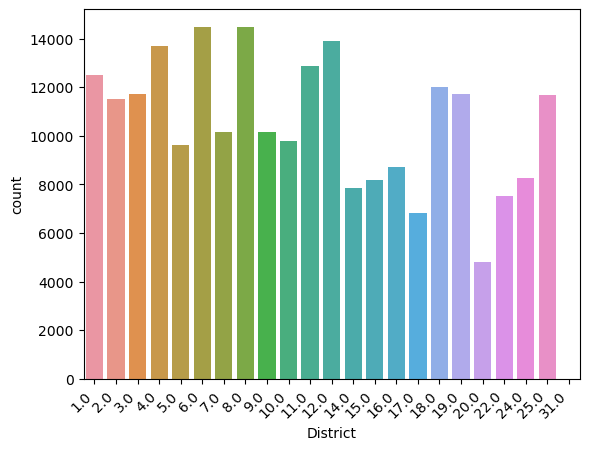

In [64]:
## visualizing 
ax = sns.countplot(data=temp_df, x='District')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

**-Districts 6 and 8 had the most crimes. District 20 had the least.**

**Topic 2) Crimes Across the Years:**

*
Is the total number of crimes increasing or decreasing across the year

*?
Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
​

In [65]:
crimes_df = df.copy()
crimes_df["Year"] = df.index.year

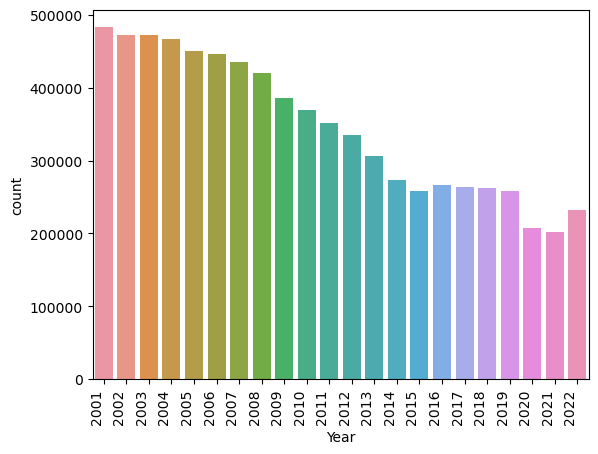

In [66]:
ax = sns.countplot(data=crimes_df, x='Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right');

**From 2001 to current crimes have decreased. Also between 2015 to 2019, it seems crimes were increasing a little bit more but went down after.**

**Topic 4) Comparing Months:**

>  ​What months have the most crime? What months have theleast?

> : Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [68]:
months_df = df.copy()
months_df["Month"] = df.index.month

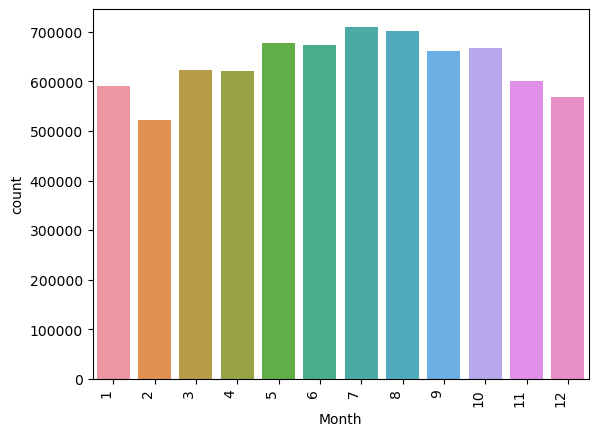

In [72]:
ax = sns.countplot(data=months_df, x='Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right');

**Months July(7) and August(8) have the most crimes. Feburary have the least amount of crimes.**